In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from lexical_reflections.utils.device import DEVICE

model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
model.to(DEVICE)
model.eval()
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [3]:
from datasets import load_dataset

data_opus_books = load_dataset("Helsinki-NLP/opus_books", "en-ru", split="train").train_test_split(
    train_size=50, shuffle=True, seed=42
)

In [4]:
train_ds = data_opus_books["train"]
test_ds = data_opus_books["test"]

train_df = train_ds.to_pandas()["translation"]
test_df = test_ds.to_pandas()["translation"][:100]

In [5]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, train_df)

Data len:  50


100%|██████████| 50/50 [00:15<00:00,  3.16it/s]


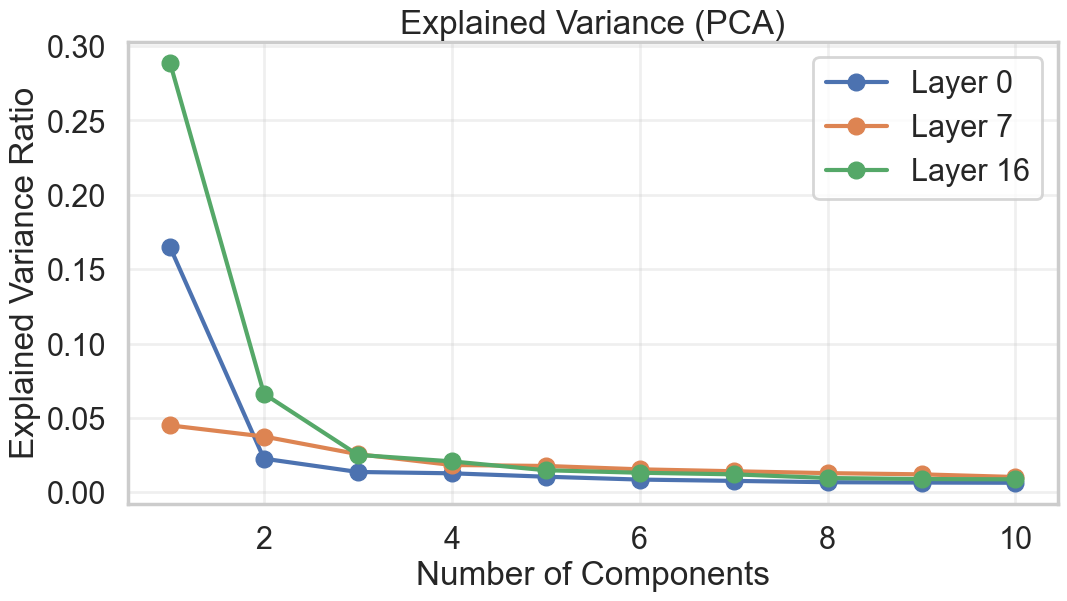

In [6]:
from lexical_reflections.pca.process_hidden_space import extract_pca_components, project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance

pca_components, pca_means, explained_variance_ratios = extract_pca_components(hidden_space_by_language)
projections = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)

Data len:  100


100%|██████████| 100/100 [00:28<00:00,  3.54it/s]


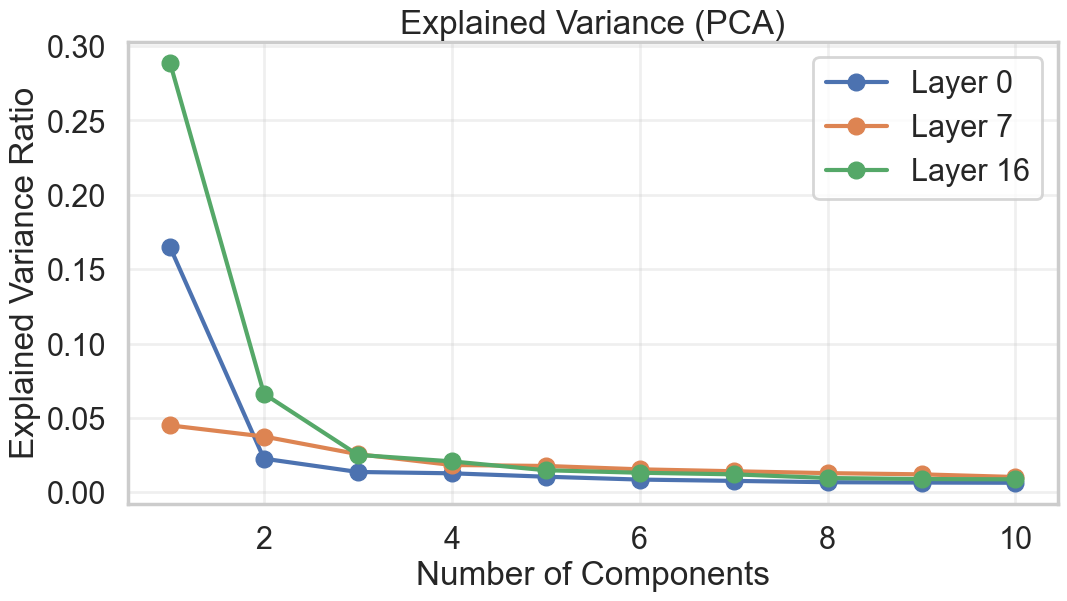

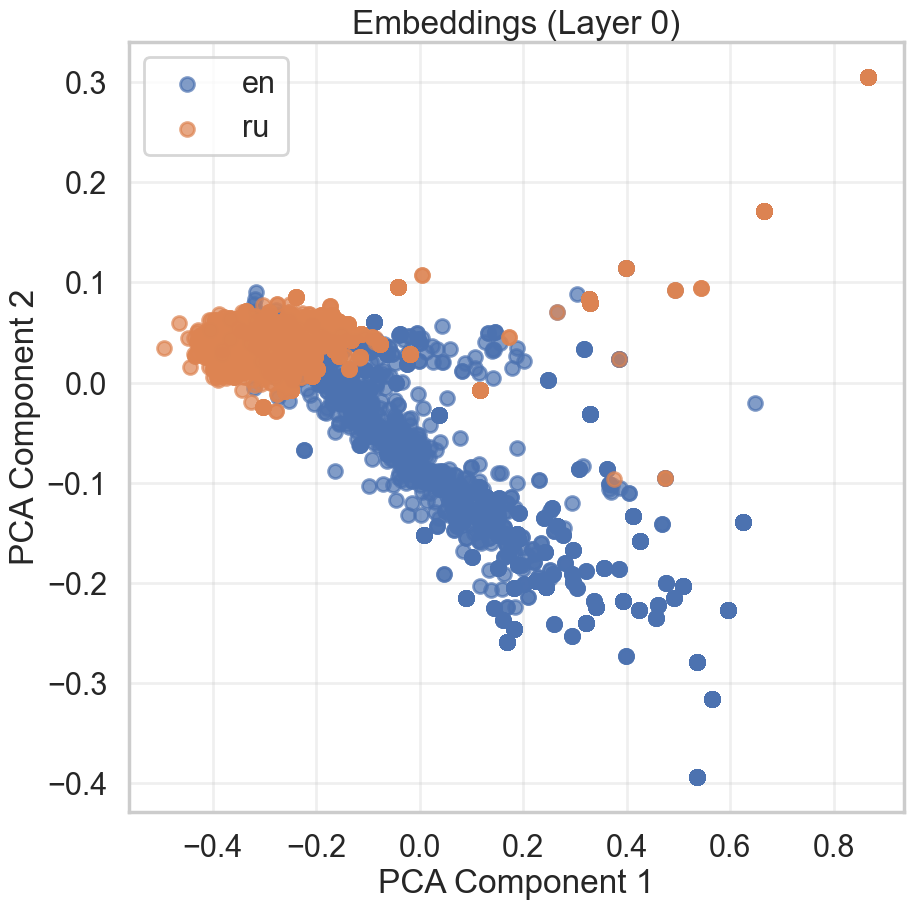

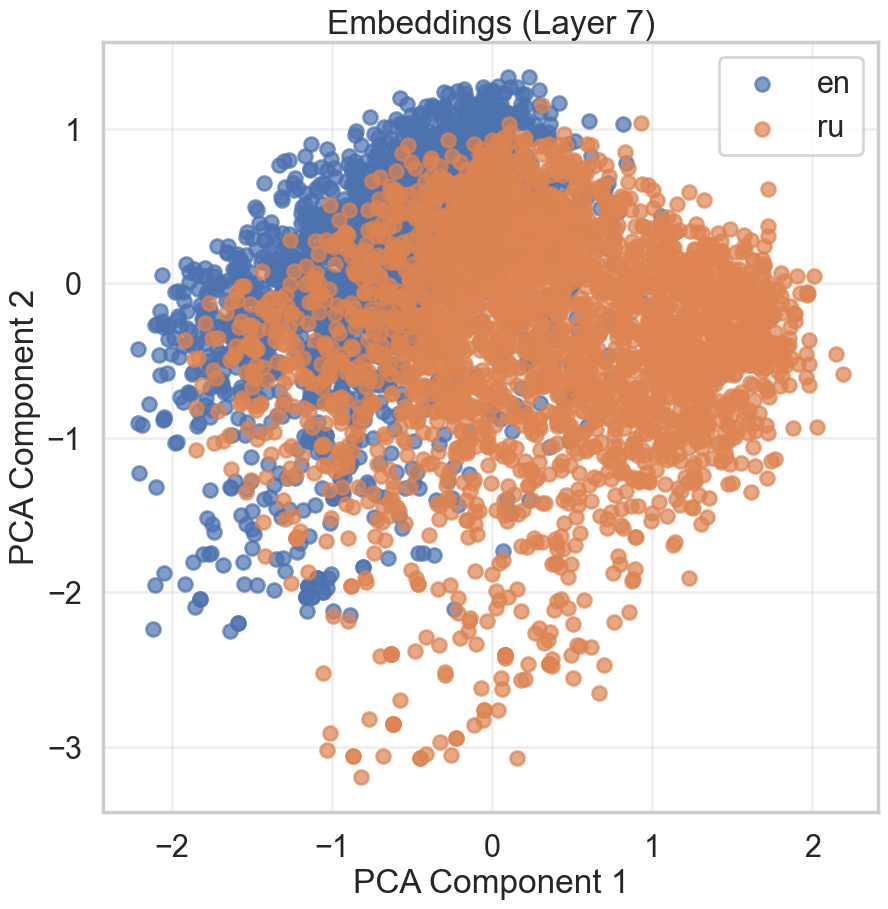

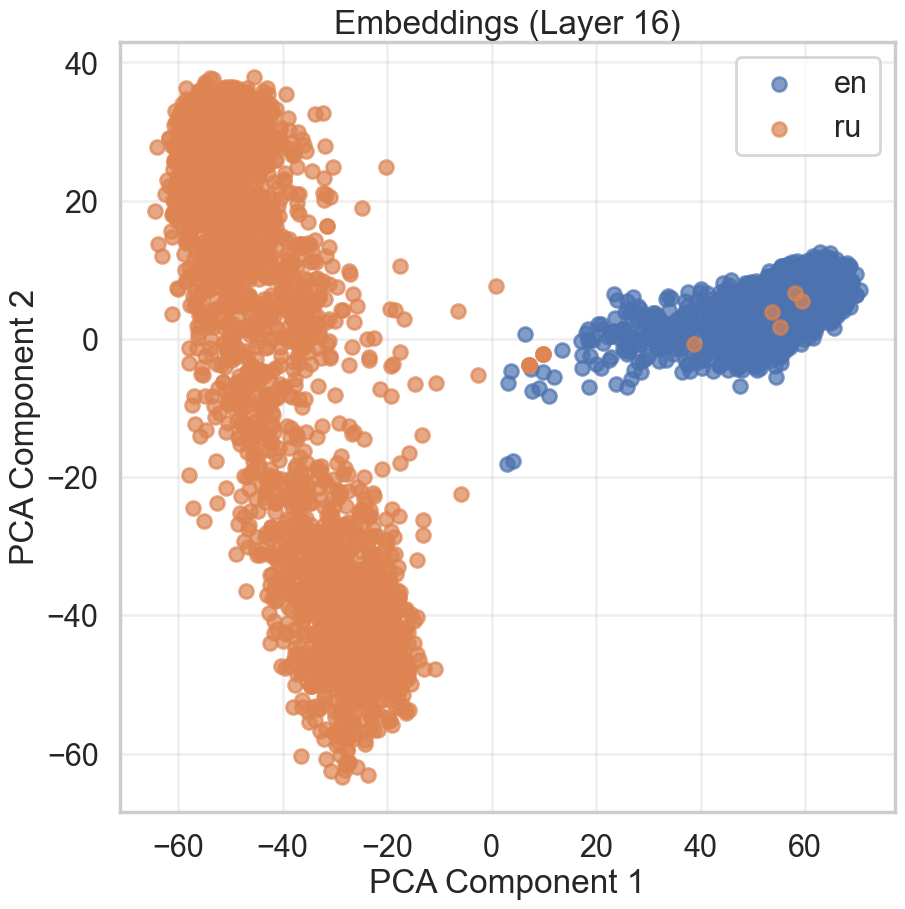

In [7]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language
from lexical_reflections.pca.analyze import project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance, visualize_projections

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, test_df)

projections = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)
visualize_projections(hidden_space_by_language, projections)